In [1]:
# Importing Necessary Modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
import csv
# Reading the data using pandas 
df = pd.read_csv('/content/read_mixed_org.csv')


df1 = pd.read_csv('/content/label.csv')
 
# print first five rows of df

 
# save the labels into a variable l.
df2 = df1['label']

print (df)
print (df2)
 
# Drop the label feature and store the pixel data in d.
#d = df.drop("label", axis = 1)
 
 

    Timestamp [s]  Timestamp [μs]  \
0      1587971914      1008694218   
1      1587971914      1008694218   
2      1589528323      1018618927   
3      1589528323      1019165338   
4      1587347261      1000078811   
5      1587347261      1000602679   
6      1590391723       208913023   
7      1590391723       208914096   
8      1590391723       218781708   
9      1590391723       218782782   
10     1625120537      1004021333   
11     1625120537      1015810510   
12     1625116530      1001133236   
13     1625116530      1001883613   
14     1625629345      1011263821   
15     1625629345       791576340   
16     1625623454       343992039   
17     1625623454       343993113   
18     1625624470      1002804140   
19     1625624470      1002805214   
20     1596608163      1000804311   
21     1596608163      1000804311   
22     1596677266       507935778   
23     1596677266       507936852   
24     1596696552       110328917   
25     1596696552       122377881   
2

In [3]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(df)
#standardized_data1 = StandardScaler().fit_transform(df1)
print(standardized_data.shape)


(40, 4)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[[ -48.080204   -25.315968   -74.97471     19.902925   -29.42427
   -71.984795  -147.15674   -151.69418   -176.24033   -129.20335
    88.159004    45.10662     23.775326    -8.177522    87.55761
    -1.6710213  -47.365166   -31.685955    96.01909    132.40024
   -20.6752       6.0948253  -68.315414   -93.65148   -102.10296
    35.450783  -121.14725    -99.45474    133.23993    144.7253
    50.860714    71.32196    101.313614    76.785      -98.85526
   -59.907795    52.08278     35.61925      7.230434    39.065292 ]
 [ -85.09038   -119.8375    -214.68814   -124.42936   -165.38724
  -132.0929     -71.99058     12.252132   -34.766518  -115.35577
    87.24024     74.38188    -17.876694    29.645248    43.051014
    73.64128    113.017006   159.12973    139.46169     95.5206
   -46.34855    -81.02037    -29.996105   -72.58841    145.27206
  -175.54475    -29.736395    13.846471    -2.9013236   38.935493
   -54.63172    -14.383322   -54.042706   -95.48345     90.18195
    64.55999    116.71

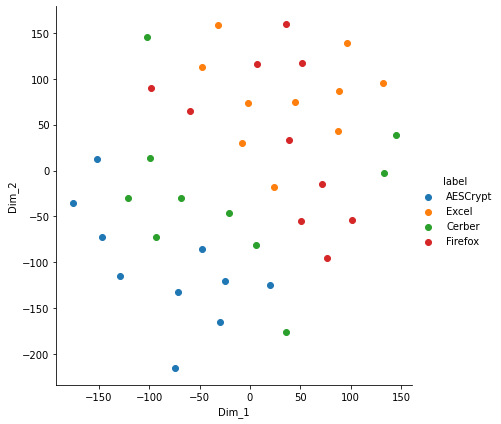

In [5]:
# TSNE
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
data_1000 = standardized_data #[0:4, :]
labels_1000 = df2

#print (data_1000)


model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

print (tsne_data.T)

print (labels_1000)


# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
columns =("Dim_1", "Dim_2", "label"))



# Plotting the result of tsne
seaborn.FacetGrid(tsne_df, hue ="label", size = 6).map(
	plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.show()